In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# load the dataset
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [21]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [22]:
# Extract open values for the dataset
train = dataset_train.loc[:, ["Open"]].values

In [23]:
print(train.shape)

(1258, 1)


In [24]:
print(train[:5])

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


In [25]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)

In [26]:
print(train_scaled[:5])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


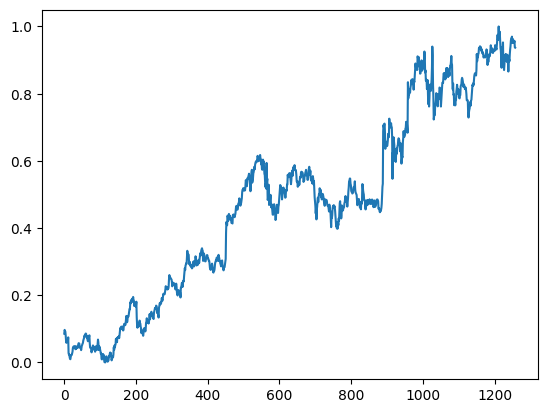

In [27]:
plt.plot(train_scaled)
plt.show()

In [28]:
dataset_train.head(20)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [29]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
print(train.shape, X_train.shape)

(1258, 1) (1208, 50, 1)


In [32]:
print(X_train[:1])

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]]]


In [33]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer
regressor.add(SimpleRNN(units = 50, activation='tanh', input_shape = (X_train.shape[1], 1)))

# Complete the code to fit the model.
# Use optimizer = ‘adam’ and loss = ‘mean_squared_error’
# Use epochs = 50 and batch_size = 32
n_epoch = 50
b_size = 32
#adding output layer
regressor.add(Dense(units=1))
#compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
#fitting the RNN
regressor.fit(X_train, y_train, epochs = n_epoch, batch_size = b_size)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1239
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6917e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.0493e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2940e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0118e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3317e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8905e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.2035e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2628e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.9236e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5458e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9

In [34]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.loc[:, ["Open"]].values
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler

In [35]:
print(inputs.shape)

(70, 1)


In [36]:
print(real_stock_price.shape)

(20, 1)


In [37]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


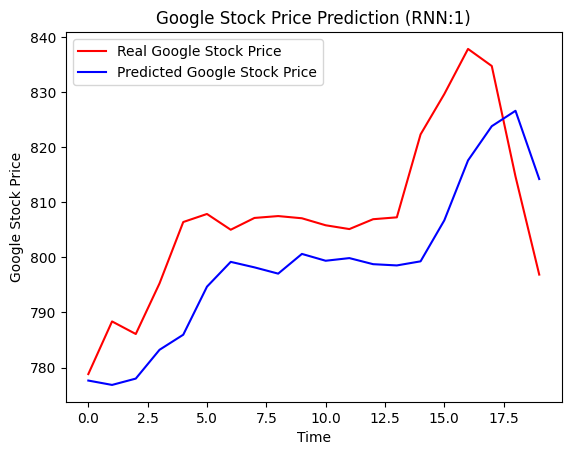

In [38]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (RNN:1)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [39]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))

# Adding a another RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0894
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0014
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.7801e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.4569e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0012
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0012
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.6473e-04
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.0673e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.7440e-04
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.0376e-04
Epoch 13/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 7.5267e-04
Epoch 14/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.5560e-04
Epoch 15/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


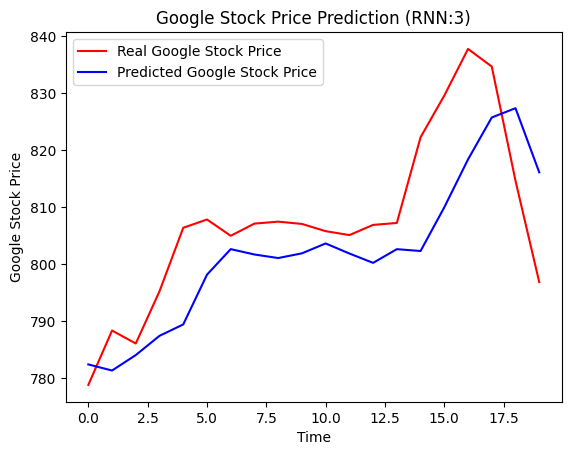

In [40]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (RNN:3)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape = (X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0770
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0026
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.9734e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.1459e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.4151e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.4373e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.2949e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.7641e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.2774e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.5089e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.0612e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.8930e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


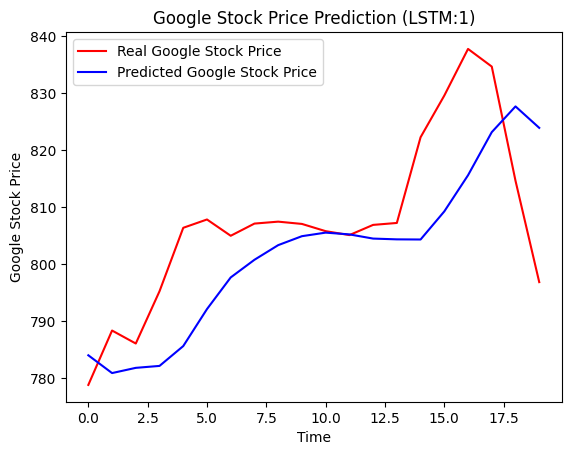

In [42]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (LSTM:1)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [43]:
model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, activation='tanh', return_sequences=True))
model.add(LSTM(50, activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0793
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0026
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0018
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0019
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0017
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0016
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0016
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0017
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0018
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0016
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0015
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0013
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0013
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0011
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0012
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


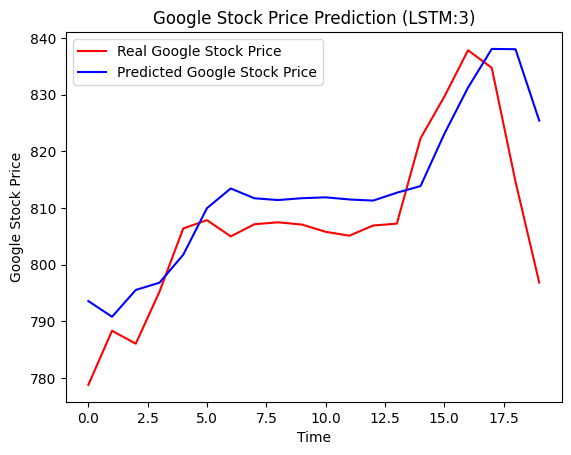

In [44]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (LSTM:3)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("image_train.csv")

In [46]:
print(train.shape)

(42000, 785)


In [47]:
print(train.head(1))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  

[1 rows x 785 columns]


label: tell what number this is <br>
784 columns --> pixel 28x28 size image -- has 1 channel

In [48]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

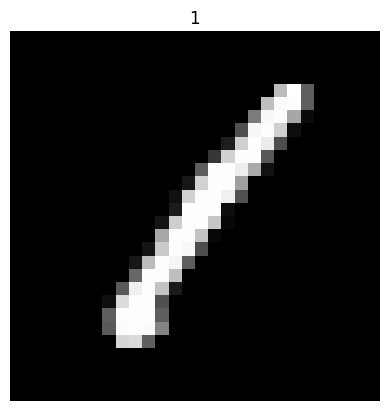

In [49]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [50]:
Y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [51]:
print(train.shape)

(42000, 785)


In [52]:
# Normalize the data
X_train = X_train / 255.0
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
# Label Encoding
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [53]:
print(Y_train.shape)

(42000, 10)


In [54]:
print(Y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [55]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [56]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 250

In [57]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [58]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 195ms/step - accuracy: 0.4509 - loss: 1.5964 - val_accuracy: 0.9364 - val_loss: 0.2356
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8080 - loss: 0.6295 - val_accuracy: 0.9381 - val_loss: 0.2344
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 189ms/step - accuracy: 0.8340 - loss: 0.5111 - val_accuracy: 0.9619 - val_loss: 0.1313
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8920 - loss: 0.3864 - val_accuracy: 0.9612 - val_loss: 0.1313
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 186ms/step - accuracy: 0.8921 - loss: 0.3398 - val_accuracy: 0.9688 - val_loss: 0.1039
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9120 - loss: 0.2810 - val_accuracy: 0.9698 - val_loss: 0.1051
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 190ms/step - accuracy: 0.9113 - loss: 0.2805 - val_accuracy: 0.9743 - val_loss: 0.0862
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9360 - loss: 0.2003 - val

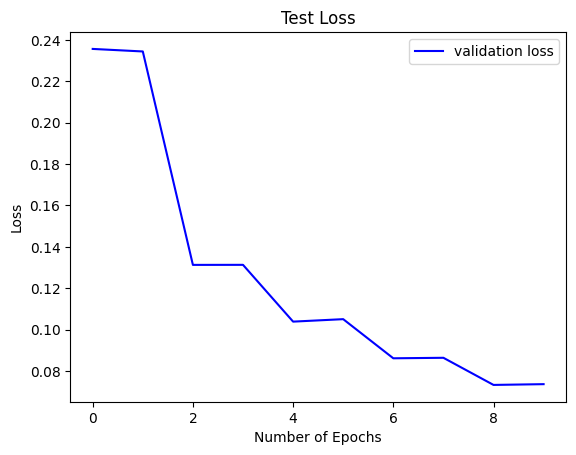

In [59]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


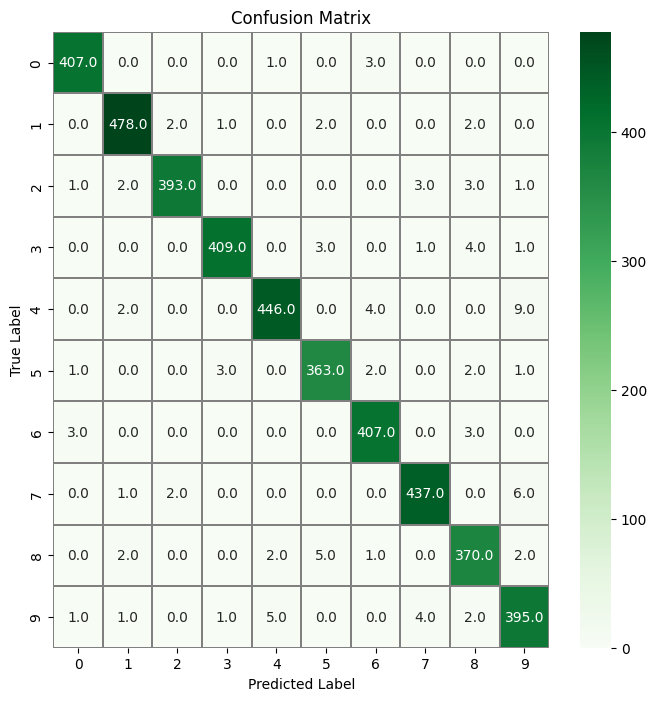

In [60]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       0.98      0.99      0.98       485
           2       0.99      0.98      0.98       403
           3       0.99      0.98      0.98       418
           4       0.98      0.97      0.97       461
           5       0.97      0.98      0.97       372
           6       0.98      0.99      0.98       413
           7       0.98      0.98      0.98       446
           8       0.96      0.97      0.96       382
           9       0.95      0.97      0.96       409

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200

